In [1]:
import pandas as pd
import numpy as np

# Sample input data
df = pd.DataFrame({
    'unit_id': [101, 102, 103],
    'open_cycles': [100000, 100000, 100000],  # All units tested for 100k cycles
    'open_force': [12.5, 10.2, 14.1],         # Force required to open (in Newtons)
    'close_force': [11.8, 9.9, 13.5],         # Force required to close (in Newtons)
    'failure': [1, 0, 1]                      # 1 = failed, 0 = passed durability test
})

# Feature engineering
df['force_diff'] = df['open_force'] - df['close_force']

df['cycle_intensity'] = df['open_cycles'] * df['force_diff']



In [2]:
df

,unit_id,open_cycles,open_force,close_force,failure,force_diff,cycle_intensity
0,101,100000,12.5,11.8,1,0.7,70000.0
1,102,100000,10.2,9.9,0,0.3,30000.0
2,103,100000,14.1,13.5,1,0.6,60000.0


In [3]:
from sklearn.ensemble import RandomForestClassifier # A robust model that handles noisy data well.
from sklearn.model_selection import train_test_split # To split data into training and testing sets
from sklearn.metrics import classification_report # To evaluate model performance

# Features and labels
X = df[['open_cycles', 'open_force', 'close_force', 'force_diff', 'cycle_intensity']] #Input features used for prediction.
y = df['failure'] #Target label (failure status).


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
#Splits data into: 70% training, 30% testing, random_state=42 ensures reproducibility.

# Model
model = RandomForestClassifier(n_estimators=100, random_state=42) # Creates a Random Forest with 100 decision trees.
model.fit(X_train, y_train) #Fits the model on training data.

# Evaluation
y_pred = model.predict(X_test) #Predicts failure status on test data.
print(classification_report(y_test, y_pred)) # Prints precision, recall, and F1-score.


              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



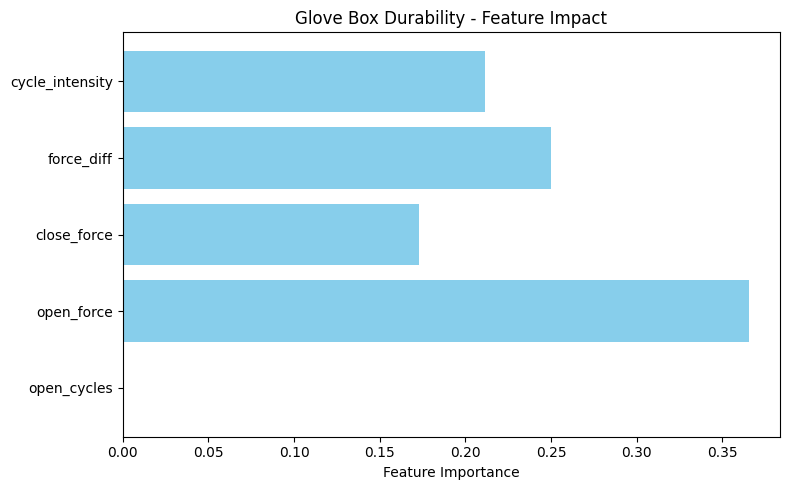

In [4]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 5))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Glove Box Durability - Feature Impact")
plt.tight_layout()
plt.show()


In [9]:
import pandas as pd
import numpy as np
import os

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 1000

# Generate synthetic data
unit_id = range(len(failure))  # Creates a unique ID for each row
unit_ids = [f"GB{i:03d}" for i in range(1, 1001)]
open_cycles = np.random.randint(100, 10000, size=n_samples)
open_force = np.random.normal(loc=50, scale=10, size=n_samples)
close_force = np.random.normal(loc=45, scale=10, size=n_samples)

# Simulate failure probability based on open_cycles and force values
failure_prob = (open_cycles / 10000) + (open_force - 50) / 100 + (close_force - 45) / 100
failure = (failure_prob > 0.8).astype(int)

# Create DataFrame
data = pd.DataFrame({
    'unit_id': unit_id,
    'open_cycles': open_cycles,
    'open_force': open_force,
    'close_force': close_force,
    'failure': failure
})

# Ensure output directory exists
#output_path = '/mnt/data/glove_box.csv'
data.to_csv(r"C:\Users\moula\NLP\glove_box.csv")


In [11]:
df=pd.read_csv(r"C:\Users\moula\NLP\glove_box.csv")

In [12]:
df

,Unnamed: 0,unit_id,open_cycles,open_force,close_force,failure
0,0,0,7370,52.502439,45.833471,0
1,1,1,960,38.602456,53.812848,0
2,2,2,5490,36.585548,35.265533,0
3,3,3,5291,68.868281,44.946026,0
4,4,4,5834,51.838834,55.383888,0
...,...,...,...,...,...,...
995,995,995,7247,55.114155,38.126157,0
996,996,996,4551,53.174719,53.506477,0
997,997,997,3976,49.680815,43.432579,0
998,998,998,6059,49.389566,31.276254,0


In [13]:
data

,unit_id,open_cycles,open_force,close_force,failure
0,0,7370,52.502439,45.833471,0
1,1,960,38.602456,53.812848,0
2,2,5490,36.585548,35.265533,0
3,3,5291,68.868281,44.946026,0
4,4,5834,51.838834,55.383888,0
...,...,...,...,...,...
995,995,7247,55.114155,38.126157,0
996,996,4551,53.174719,53.506477,0
997,997,3976,49.680815,43.432579,0
998,998,6059,49.389566,31.276254,0


In [15]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate unit IDs
unit_ids = [f"GB{i:03d}" for i in range(1, 1001)]

# Generate synthetic features
open_cycles = np.random.randint(100, 1000, size=1000)
open_force = np.random.normal(loc=50, scale=10, size=1000)
close_force = np.random.normal(loc=45, scale=10, size=1000)

# Generate failure as a linear combination with noise
# Assume failure is influenced by open_cycles, open_force, and close_force
failure = 0.01 * open_cycles + 0.5 * open_force - 0.3 * close_force + np.random.normal(loc=0, scale=5, size=1000)

# Create DataFrame
data = pd.DataFrame({
    "unit_id": unit_ids,
    "open_cycles": open_cycles,
    "open_force": open_force,
    "close_force": close_force,
    "failure": failure
})

# Save to CSV
output_path = r"C:\Users\moula\NLP\glove_box.csv"
data.to_csv(output_path, index=False)

print(f"Synthetic dataset saved to {output_path}")


Synthetic dataset saved to C:\Users\moula\NLP\glove_box.csv


In [16]:
GB_df=pd.read_csv(r"C:\Users\moula\NLP\glove_box.csv")

In [17]:
GB_df

,unit_id,open_cycles,open_force,close_force,failure
0,GB001,202,58.233525,37.189796,10.842452
1,GB002,535,70.524527,41.294937,27.949739
2,GB003,960,52.511950,34.894059,23.016861
3,GB004,370,45.462033,44.328164,19.762391
4,GB005,206,29.707691,53.316283,-7.465582
...,...,...,...,...,...
995,GB996,863,52.457340,61.341953,30.209699
996,GB997,837,41.386163,30.218529,17.422481
997,GB998,905,41.195380,33.685864,17.930138
998,GB999,405,59.621994,42.293794,7.927361


In [40]:
# Define target column
target = 'failure'

# Check if target column exists
if target not in df.columns:
    raise ValueError(f"Target column '{target}' not found in DataFrame")

# Define features and target
X = df[['open_cycles', 'open_force', 'close_force']]  # Input features
y = df[target]  # Target label

In [42]:
df['force_diff']=df['open_force'] - df['close_force']

In [43]:
df['cycle_intensity']=df['open_cycles']*df['force_diff']
df['wear_rate']=df['force_diff']/df['open_cycles']

In [42]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plot_path = os.path.join(output_dir, "actual_vs_predicted.png")
plt.savefig(plot_path)
plt.close()
plt.show()
# print(f"Plot saved to {plot_path}")


Mean Squared Error: 25.6371
R-squared: 0.6423


In [43]:
df

,unit_id,open_cycles,open_force,close_force,failure
0,GB001,202,58.233525,37.189796,10.842452
1,GB002,535,70.524527,41.294937,27.949739
2,GB003,960,52.511950,34.894059,23.016861
3,GB004,370,45.462033,44.328164,19.762391
4,GB005,206,29.707691,53.316283,-7.465582
...,...,...,...,...,...
995,GB996,863,52.457340,61.341953,30.209699
996,GB997,837,41.386163,30.218529,17.422481
997,GB998,905,41.195380,33.685864,17.930138
998,GB999,405,59.621994,42.293794,7.927361


In [44]:
df.columns

Index(['unit_id', 'open_cycles', 'open_force', 'close_force', 'failure'], dtype='object')

In [46]:
# Reorder using loc
df = df.loc[:, [col for col in df.columns if col != 'failure'] + ['failure']]


In [45]:
df

,unit_id,open_cycles,open_force,close_force,failure
0,GB001,202,58.233525,37.189796,10.842452
1,GB002,535,70.524527,41.294937,27.949739
2,GB003,960,52.511950,34.894059,23.016861
3,GB004,370,45.462033,44.328164,19.762391
4,GB005,206,29.707691,53.316283,-7.465582
...,...,...,...,...,...
995,GB996,863,52.457340,61.341953,30.209699
996,GB997,837,41.386163,30.218529,17.422481
997,GB998,905,41.195380,33.685864,17.930138
998,GB999,405,59.621994,42.293794,7.927361


In [50]:
# Convert continuous target to binary: 1 if failure > threshold, else 0
threshold = 0.5  # You can adjust this based on your domain
y_class = (y > threshold).astype(int)

In [50]:
# Encode target if needed
y = y.map({'No': 0, 'Yes': 1})  # Adjust based on your actual labels


In [51]:
from sklearn.preprocessing import LabelEncoder

df['unit_id_encoded'] = LabelEncoder().fit_transform(df['unit_id'])
X = df.drop(columns=['unit_id', 'failure'])  # Use encoded version


In [53]:
print(df['failure'].isna().sum())


0


In [54]:
df = df.dropna(subset=['failure'])


In [55]:
df['failure'] = df['failure'].map({'No': 0, 'Yes': 1})


In [66]:
df['failure'] = df['failure'].astype(int)


C:\Users\moula\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\moula\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Random Forest CV Accuracy: 0.9780000000000001
Gradient Boosting CV Accuracy: 0.9719999999999999


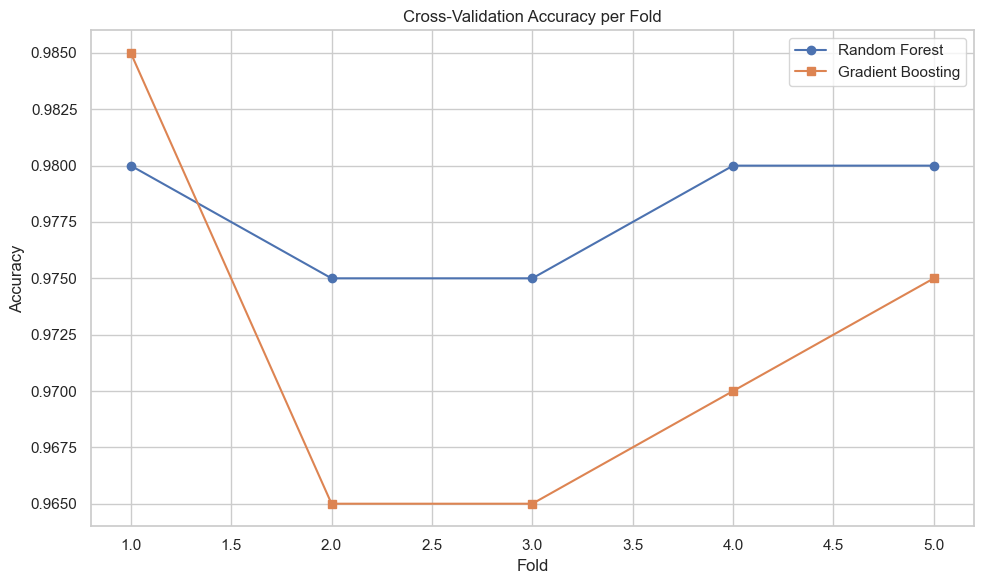

In [60]:
df = df.dropna(subset=['failure'])
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data_path = "C:\\Users\\moula\\NLP\\glove_box.csv"
df = pd.read_csv(data_path)

# Drop rows with missing values
df.dropna(inplace=True)

# Drop irrelevant columns (e.g., IDs)
df = df.drop(columns=['unit_id'], errors='ignore')  # only if 'unit_id' exists

# Convert continuous target 'failure' into discrete classes
# You can adjust bins and labels based on your domain
y = df['failure']
y_class = pd.cut(y, bins=[-np.inf, 0.3, 0.7, np.inf], labels=[0, 1, 2])
y_class = y_class.astype(int)

# Drop original target from features
X = df.drop(columns=['failure'])

# Encode categorical features
X_encoded = X.copy()
for col in X_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])

# Initialize models
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# Evaluate with cross-validation
rf_scores = cross_val_score(rf, X_encoded, y_class, cv=5)
gb_scores = cross_val_score(gb, X_encoded, y_class, cv=5)

# Print results
print("Random Forest CV Accuracy:", rf_scores.mean())
print("Gradient Boosting CV Accuracy:", gb_scores.mean())

# Plot CV scores
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), rf_scores, marker='o', label='Random Forest')
plt.plot(range(1, 6), gb_scores, marker='s', label='Gradient Boosting')
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("Cross-Validation Accuracy per Fold")
plt.legend()
plt.tight_layout()
plt.show()

In [58]:
df['failure'] = df['failure'].astype(int)


In [59]:
df['failure'] = df['failure'].astype('Int64')  # Capital "I"


In [62]:
df = df.dropna(subset=['failure'])


In [63]:
print(df.shape)
print(df['failure'].value_counts(dropna=False))


(1000, 4)
failure
17.285446    1
10.842452    1
27.949739    1
23.016861    1
19.762391    1
            ..
29.597270    1
22.131262    1
21.169181    1
14.643840    1
30.467936    1
Name: count, Length: 1000, dtype: int64


In [64]:
print(df['failure'].unique())
print(df['failure'].isna().sum())


[ 1.08424521e+01  2.79497394e+01  2.30168613e+01  1.97623908e+01
 -7.46558157e+00  2.35622324e+01  9.12484392e+00  2.14589624e+01
  3.04679361e+01  1.46438397e+01  2.11691812e+01  2.21312622e+01
  2.95972696e+01  1.59023564e+01  1.25618802e+01  2.67111860e+01
  3.10386856e+01  1.25500744e+01  2.44321065e+01  1.09805292e+00
  2.85947405e+01 -2.35786889e+00  2.96698827e+01  2.35573272e+01
  2.59182356e+01  3.68343209e+00  2.54073163e+01  2.32003301e+00
  2.20845141e+01  1.13961572e+01  9.61352142e+00  1.61138264e+01
  1.53627743e+01  1.74623941e+01  1.69176934e+01  2.43654912e+01
  3.98599811e+01  2.89317822e+01  3.34394954e+01  7.03381912e+00
  1.76037234e+01  8.32701667e+00  1.42365776e+01  2.02371297e+01
  2.99424183e+01  1.58209517e+01  9.87840920e+00  2.62721577e+01
  1.36569783e+01  1.37606619e+01  2.05005435e+01  1.86965340e+01
  2.54914757e+01  9.77815404e-01  2.66486740e+01  2.05809430e+01
  1.51120873e+01  9.81377366e-01  2.08957320e+01  1.36673236e+01
  1.05062582e+01 -5.56657

In [64]:
df['failure'] = df['failure'].map({'No': 0, 'Yes': 1})


In [65]:
df = df.dropna(subset=['failure'])


In [68]:
df = pd.read_csv("C:\\Users\\moula\\ML\Glove box\\glove_box1.csv")  # or however you loaded it
df['failure'] = df['failure'].map({'No': 0, 'Yes': 1})
df = df.dropna(subset=['failure'])


<>:1: SyntaxWarning: invalid escape sequence '\G'
<>:1: SyntaxWarning: invalid escape sequence '\G'
C:\Users\moula\AppData\Local\Temp\ipykernel_18116\647906281.py:1: SyntaxWarning: invalid escape sequence '\G'
  df = pd.read_csv("C:\\Users\\moula\\ML\Glove box\\glove_box1.csv")  # or however you loaded it


C:\Users\moula\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\moula\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Random Forest CV Accuracy: 0.9780000000000001
Gradient Boosting CV Accuracy: 0.9719999999999999


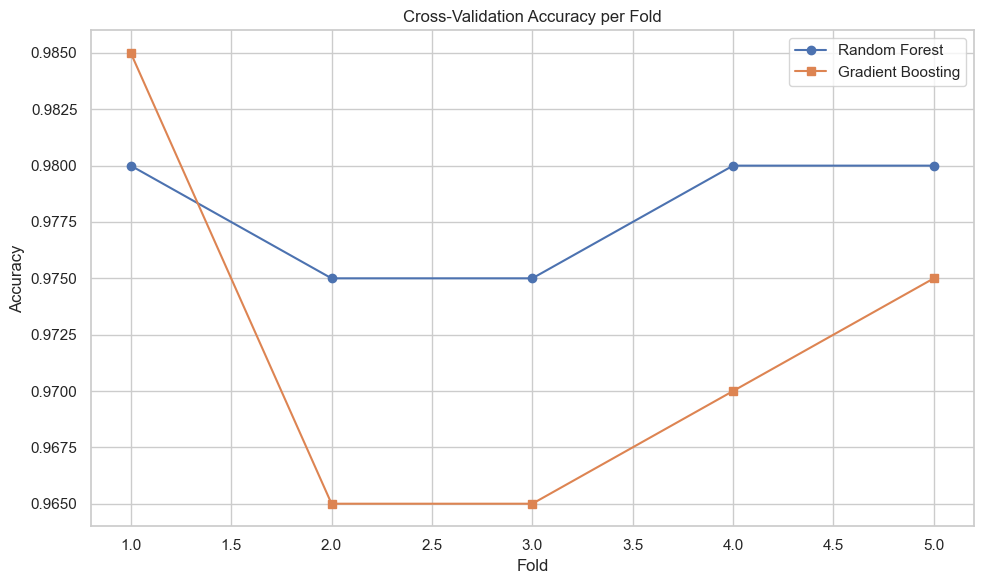

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data_path = "C:\\Users\\moula\\NLP\\glove_box.csv"
df = pd.read_csv(data_path)

# Drop rows with missing values
df.dropna(inplace=True)

# Drop irrelevant columns (e.g., IDs)
df = df.drop(columns=['unit_id'], errors='ignore')  # only if 'unit_id' exists

# Convert continuous target 'failure' into discrete classes
# You can adjust bins and labels based on your domain
y = df['failure']
y_class = pd.cut(y, bins=[-np.inf, 0.3, 0.7, np.inf], labels=[0, 1, 2])
y_class = y_class.astype(int)

# Drop original target from features
X = df.drop(columns=['failure'])

# Encode categorical features
X_encoded = X.copy()
for col in X_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])

# Initialize models
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# Evaluate with cross-validation
rf_scores = cross_val_score(rf, X_encoded, y_class, cv=5)
gb_scores = cross_val_score(gb, X_encoded, y_class, cv=5)

# Print results
print("Random Forest CV Accuracy:", rf_scores.mean())
print("Gradient Boosting CV Accuracy:", gb_scores.mean())

# Plot CV scores
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), rf_scores, marker='o', label='Random Forest')
plt.plot(range(1, 6), gb_scores, marker='s', label='Gradient Boosting')
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("Cross-Validation Accuracy per Fold")
plt.legend()
plt.tight_layout()
plt.show()

**📌Step 1: Confusion Matrix**

This shows how well the model distinguishes between the classes (0, 1, 2). You’ll see where it gets things right and where it confuses one class for another.


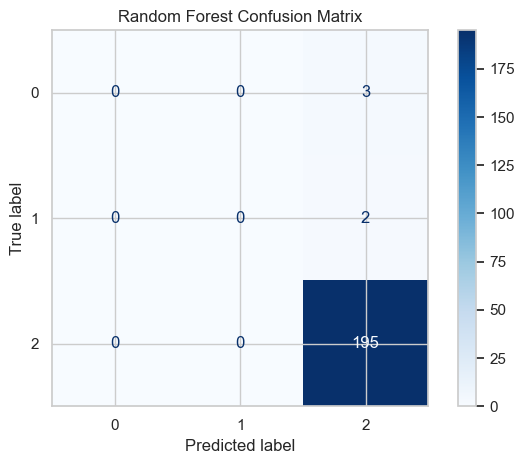

In [69]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Split data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_class, test_size=0.2, random_state=42)

# Fit model and predict
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot(cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.tight_layout()
plt.show()

**📌 Step 2: Feature Importance**

This tells you which features the Random Forest relied on most when making predictions.


C:\Users\moula\AppData\Local\Temp\ipykernel_18116\1591089392.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette='viridis')


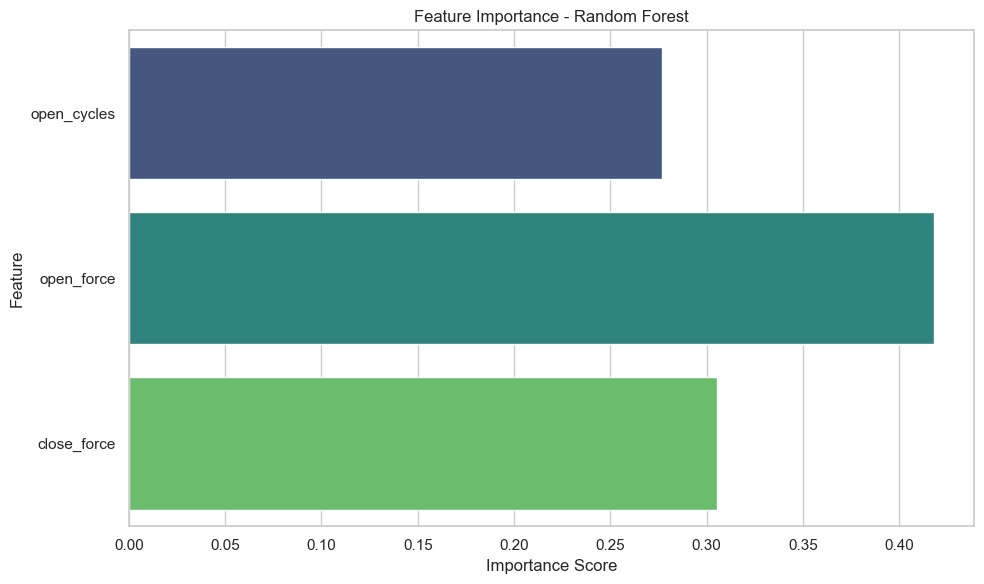

In [70]:
importances = rf.feature_importances_
feature_names = X_encoded.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names, palette='viridis')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

**🔄 Comparing Feature Importance Across Model**

In [72]:
from sklearn.ensemble import GradientBoostingClassifier

# Assuming you already have X_train and y_train from earlier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [73]:
gb_importance = pd.Series(gb.feature_importances_, index=X_encoded.columns).sort_values(ascending=False)

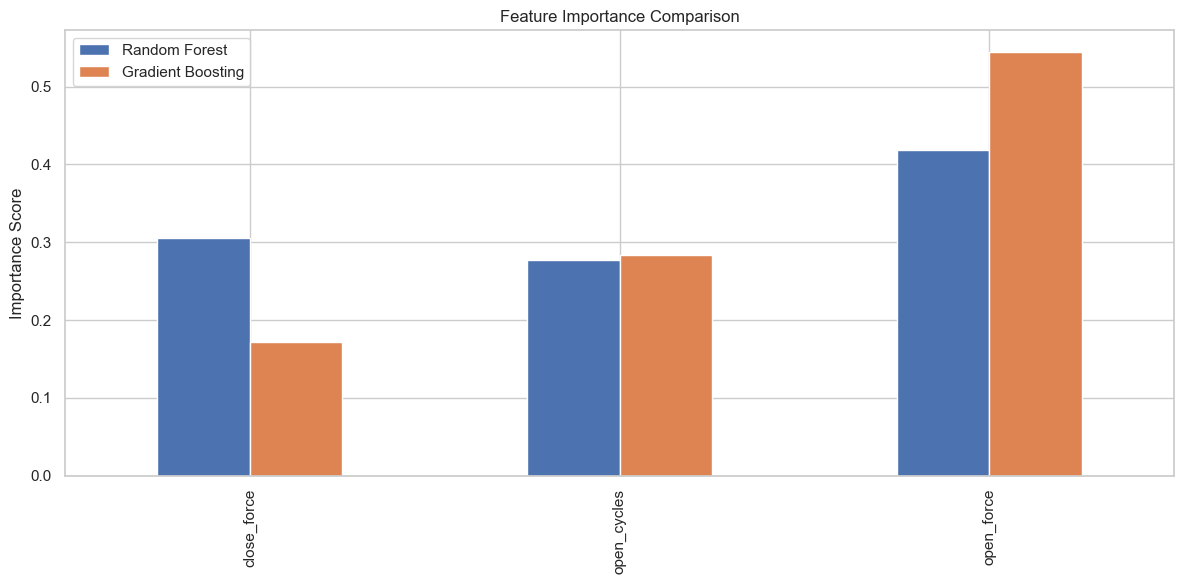

In [74]:
rf_importance = pd.Series(rf.feature_importances_, index=X_encoded.columns).sort_values(ascending=False)
gb_importance = pd.Series(gb.feature_importances_, index=X_encoded.columns).sort_values(ascending=False)

importance_df = pd.DataFrame({
    'Random Forest': rf_importance,
    'Gradient Boosting': gb_importance
})

importance_df.plot(kind='bar', figsize=(12, 6), title='Feature Importance Comparison')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

C:\Users\moula\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\moula\AppData\Local\Temp\ipykernel_18116\1184904948.py:8: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, plot_type="bar")


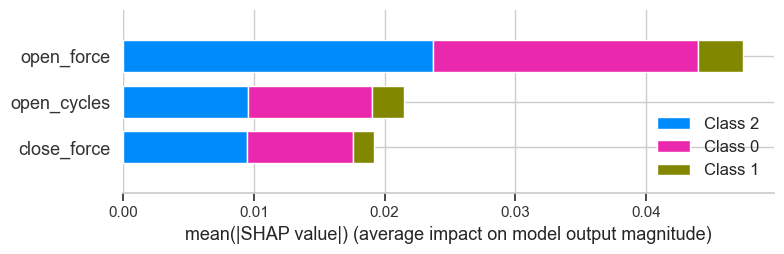

In [76]:
import shap

# Create explainer and compute SHAP values
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# Summary plot (global)
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Detailed plot (local for one instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test.iloc[0])